In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Validation.Validation import ExceptOneValidation
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data/data_filtrage_5.csv")

In [3]:
df=data.copy()

In [6]:
period=5000
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
history_y=[]
history_z=[]
score_test=[]
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df[['y_force','z_force']]
for i in range(0,len(X),period):
    if i==0:
        X_train=X.iloc[period:,:]
        y_train=y.iloc[period:,:]
        X_test=X.iloc[0:period,:]
        y_test=y.iloc[0:period,:]
    elif i==len(X)-period:
        X_train=X.iloc[0:i,:]
        y_train=y.iloc[0:i,:]
        X_test=X.iloc[i:i+period,:]
        y_test=y.iloc[i:i+period,:]
    else:
        X_train=pd.concat([X.iloc[0:i,:],X.iloc[i+period:,:]],axis=0)
        y_train=pd.concat([y.iloc[0:i,:],y.iloc[i+period:,:]],axis=0)
        X_test=X.iloc[i:i+period,:]
        y_test=y.iloc[i:i+period,:]
    for i in range(4):
        score,error,predict=ExceptOneValidation(lgbmr,X_train,y_train['y_force'])
        X_train['y_pred']=predict
        history_y.append((score,error,predict))
        if 'z_pred' in X_train.columns:
            X_train=X_train.drop(['z_pred'],axis=1)
        score,error,predict=ExceptOneValidation(lgbmr,X_train,y_train['z_force'])
        history_z.append((score,error,predict))
        X_train['z_pred']=predict
        lgbmr.fit(X_train,y_train['z_force'])
        score_test.append(lgbmr.score(X_test,y_test['z_force']))
        X=X_train.drop(['y_pred'],axis=1)
    

/tmp/ipykernel_4286/891284980.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_pred']=predict
/tmp/ipykernel_4286/891284980.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['z_pred']=predict


ValueError: Number of features of the model must match the input. Model n_features_ is 8 and input n_features is 6

In [8]:
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
history_y=[]
history_z=[]
score_test=[]
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df[['y_force','z_force']]
for i in range(4):
        score,error,predict=ExceptOneValidation(lgbmr,X,y['y_force'])
        X['y_pred']=predict
        history_y.append((score,error,predict))
        if 'z_pred' in X.columns:
            X=X.drop(['z_pred'],axis=1)
        score,error,predict=ExceptOneValidation(lgbmr,X,y['z_force'])
        history_z.append((score,error,predict))
        X['z_pred']=predict
        X=X.drop(['y_pred'],axis=1)

In [9]:
pd.Series().describe()

/tmp/ipykernel_4286/3191348471.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(score_test).describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [10]:
history_z

[([0.9727917975780904,
   0.838582366118231,
   0.9883247814348675,
   0.9674397487995643,
   0.9884536994046175,
   0.9918966331986944,
   0.990396807024307,
   0.9882832370771405,
   0.9861753497361774,
   0.8918575256693797,
   0.9508739168726458,
   0.9880230625021932,
   0.913859837895636,
   0.9767964279351523,
   0.9811267633144444,
   0.9759384603458691,
   0.9810933301927465,
   0.8871455022067101,
   0.9216947566243952,
   0.9816370413129328,
   0.9920203783534788,
   0.993737845245833,
   0.9902124289148062,
   0.9957004121391083,
   0.9891190222115618,
   0.9933904318615744,
   0.9879450164996353,
   0.9911768932879755,
   0.9902982676690976,
   0.9909066768009478,
   0.9889836520791586,
   0.9755077414955613,
   0.7379934648863268,
   0.9815375920015691,
   0.9699075400405016,
   0.9454134397532722,
   0.9571688696043378,
   0.9853882280872314,
   0.9693057989566964,
   0.9562019286792862,
   0.9901883164006341,
   0.9890766042982846,
   0.9893864537815262,
   0.9041991047

## fit lgbm without y to predict z

In [19]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df['z_force']
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
score_z,error_z,predict_z=ExceptOneValidation(lgbmr,X,y)

In [20]:
pd.Series(score_z).describe()

count    100.000000
mean       0.977343
std        0.036071
min        0.729385
25%        0.980191
50%        0.988291
75%        0.992332
max        0.998286
dtype: float64

In [21]:
pd.Series(error_z).describe()

count      100.000000
mean      5976.811395
std       9634.064583
min        472.720572
25%       2044.389829
50%       3155.948582
75%       5316.373759
max      75856.253515
dtype: float64

## fit lgbm to predict y

In [4]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df['y_force']

In [5]:
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
score_y,error_y,predict_y=ExceptOneValidation(lgbmr,X,y)

In [6]:
pd.Series(score_y).describe()

count    100.000000
mean       0.975117
std        0.034605
min        0.702399
25%        0.973266
50%        0.983157
75%        0.990691
max        0.997915
dtype: float64

In [7]:
pd.Series(error_y).describe()

count     100.000000
mean      407.971362
std       575.094556
min        32.176634
25%       150.339629
50%       265.163784
75%       437.865116
max      4870.527229
dtype: float64

In [8]:
df['y_pred']=predict_y
df

,index,nb_seance,nb_passage,x_lumbar,y_lumbar,z_lumbar,x_tibia,y_tibia,z_tibia,x_force,y_force,z_force,y_pred
0,0,0.0,0.0,-0.354351,-0.042948,0.261788,-0.165072,-0.407106,-0.649198,1.057183,-8.941128,31.378262,-34.433573
1,1,0.0,0.0,-0.353287,-0.043432,0.263230,-0.162715,-0.406823,-0.646435,1.183851,-8.263459,32.026108,-35.568415
2,2,0.0,0.0,-0.352223,-0.043917,0.264676,-0.160352,-0.406543,-0.643677,1.308062,-7.649749,32.628689,-35.568415
3,3,0.0,0.0,-0.351161,-0.044405,0.266124,-0.157983,-0.406266,-0.640924,1.429992,-7.098335,33.187741,-39.436585
4,4,0.0,0.0,-0.350099,-0.044895,0.267573,-0.155608,-0.405991,-0.638178,1.549815,-6.607554,33.704999,-39.314604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4995,9.0,9.0,-1.247857,-0.006365,-0.073970,-0.548191,0.864322,1.466927,1.760153,9.349373,29.099964,15.258602
499996,4996,9.0,9.0,-1.248948,-0.005920,-0.073792,-0.548320,0.862967,1.466453,1.784167,9.327843,28.656276,15.258602
499997,4997,9.0,9.0,-1.250037,-0.005474,-0.073614,-0.548441,0.861616,1.465974,1.807832,9.308552,28.183878,15.258602
499998,4998,9.0,9.0,-1.251125,-0.005028,-0.073434,-0.548556,0.860270,1.465492,1.831152,9.291537,27.681607,15.258602


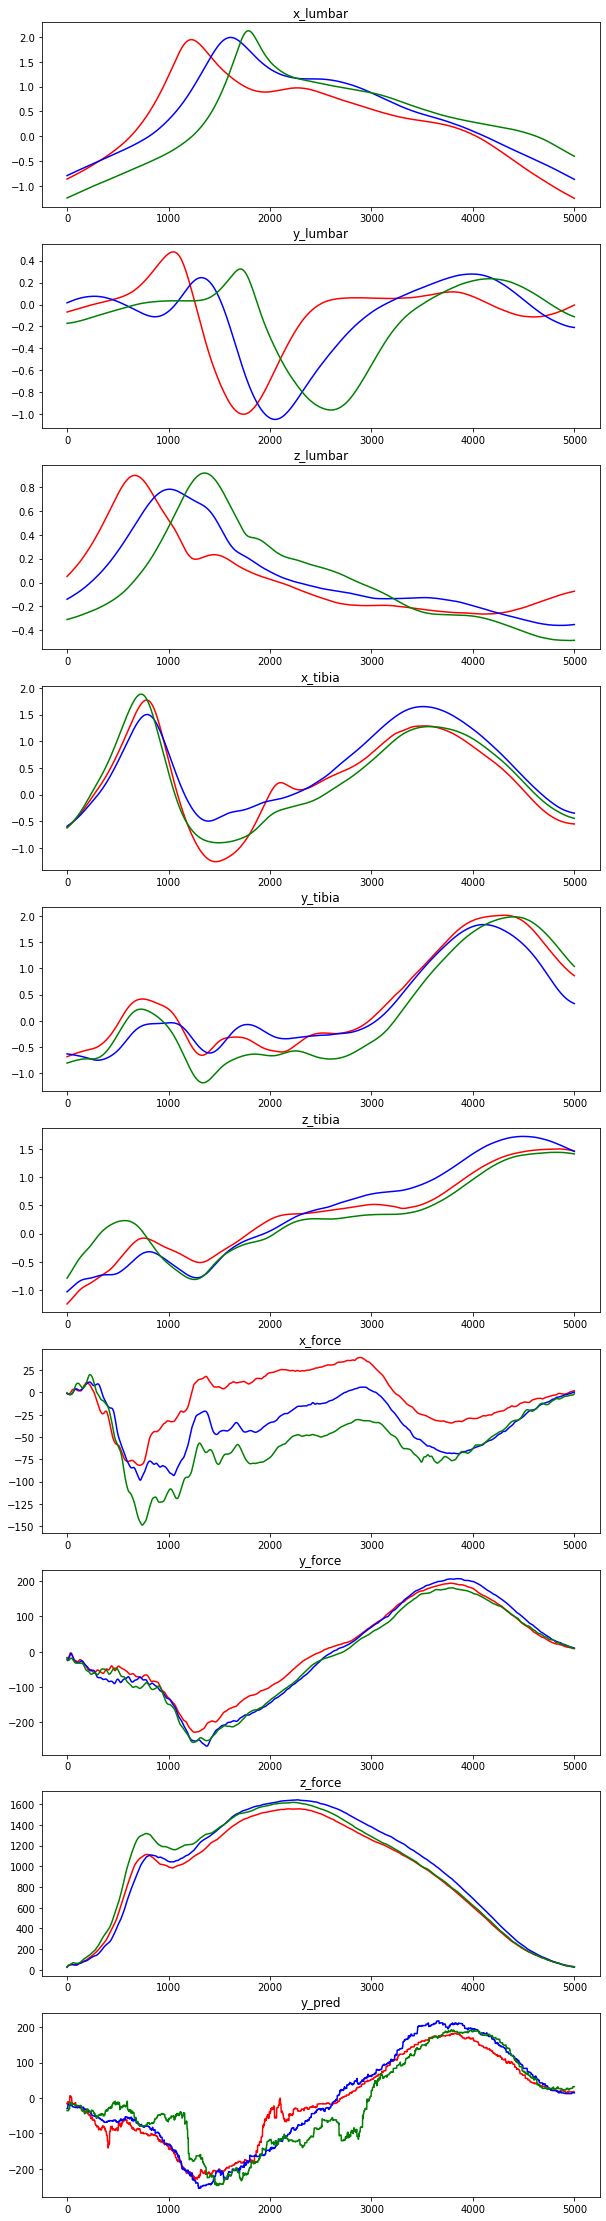

In [9]:
k=99
n=50
i=32
fig,axes = plt.subplots(10,1,figsize=(10,40))
for row,col in enumerate(df.columns[3:]):
    df[col].iloc[k*5000:k*5000+5000].reset_index(drop=True).plot(ax=axes[row],title=col,color='r')
    df[col].iloc[n*5000:n*5000+5000].reset_index(drop=True).plot(ax=axes[row],color='b')
    df[col].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[row],color='g')

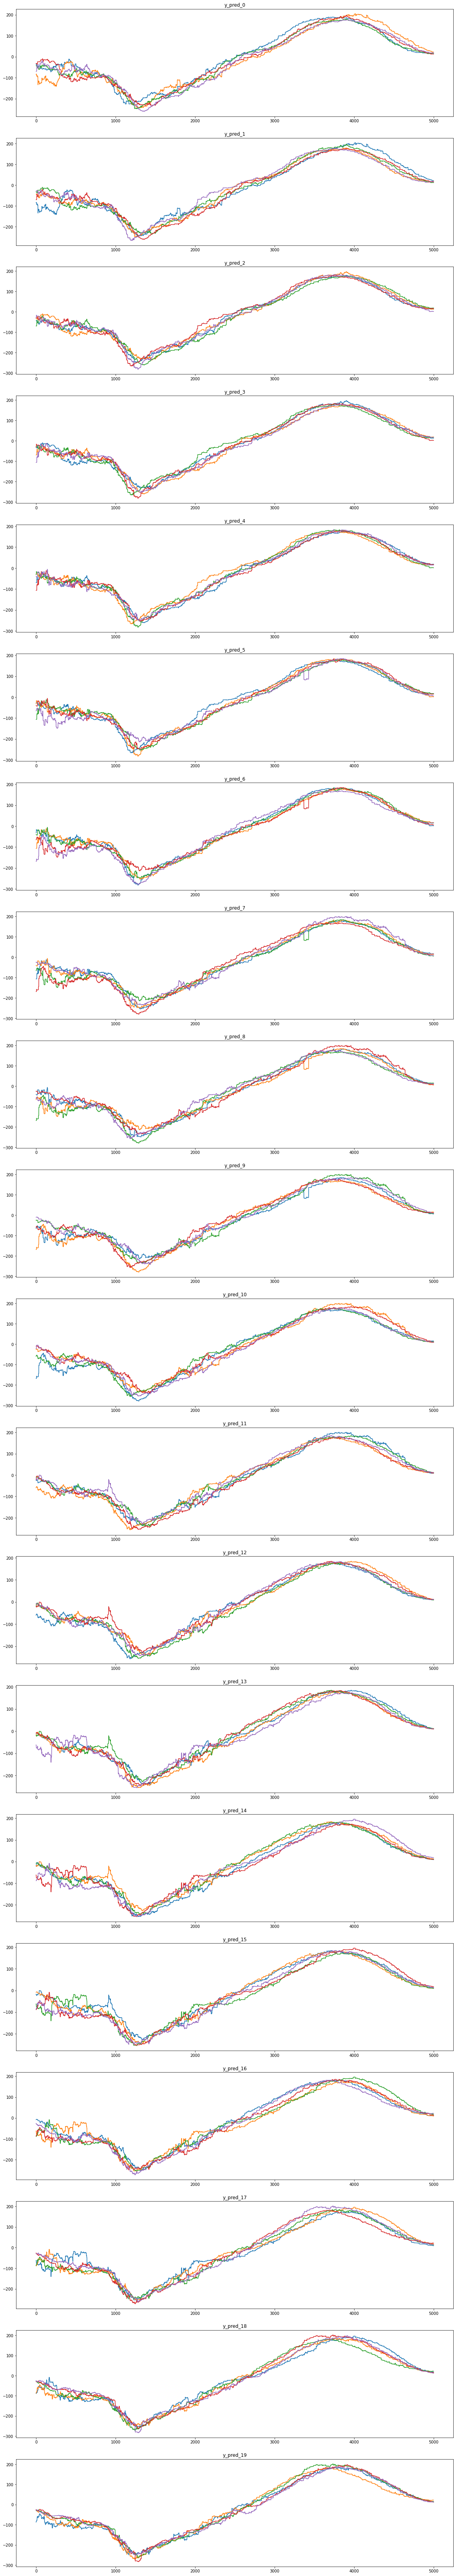

In [10]:
fig,axes = plt.subplots(20,1,figsize=(20,120))
for i in range(20):
    df['y_pred'].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+1)*5000:(i+1)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+2)*5000:(i+2)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+3)*5000:(i+3)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+4)*5000:(i+4)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')

### Apply a moving average on y_pred and replace value by the last

In [41]:
df['y_pred_smooth']=df['y_pred']
wind=3
windna=int((wind-1)/2)
for i in range(100):
    df['y_pred_smooth'].iloc[i*5000+windna:i*5000+5000-windna]=df['y_pred'].iloc[i*5000:i*5000+5000].rolling(wind,center=True).mean().iloc[windna:-windna]

/tmp/ipykernel_4272/3613270926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_pred_smooth'].iloc[i*5000+windna:i*5000+5000-windna]=df['y_pred'].iloc[i*5000:i*5000+5000].rolling(wind,center=True).mean().iloc[windna:-windna]


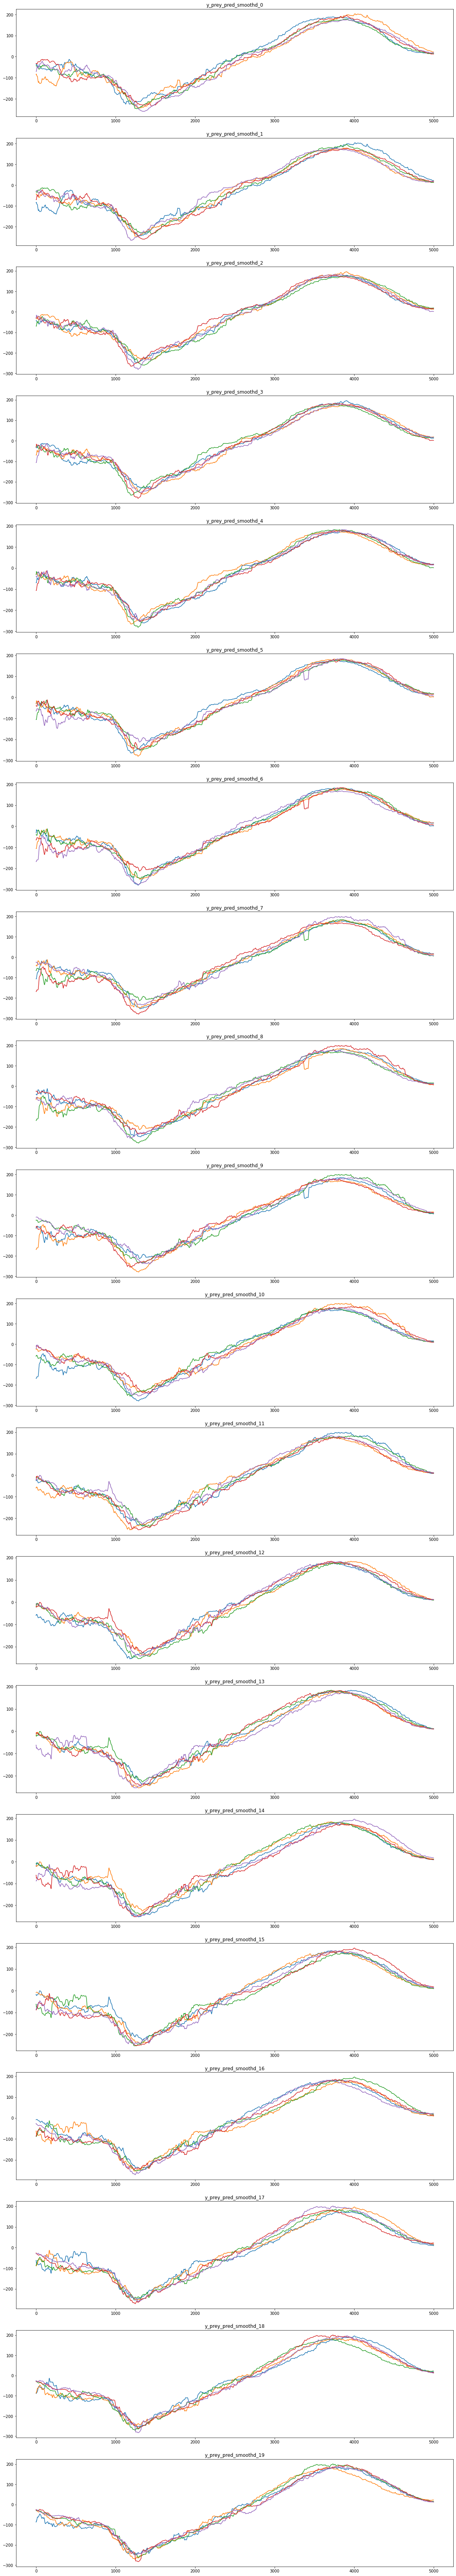

In [37]:
fig,axes = plt.subplots(20,1,figsize=(20,120))
for i in range(20):
    df['y_pred_smooth'].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+1)*5000:(i+1)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+2)*5000:(i+2)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+3)*5000:(i+3)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+4)*5000:(i+4)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_prey_pred_smoothd_{i}')

## fit lgbm with y_pred injection to predict z

In [42]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df['z_force']

In [10]:
score_z,error_z,predict_z=ExceptOneValidation(lgbmr,X,y)

In [11]:
pd.Series(score_z).describe()

count    100.000000
mean       0.977343
std        0.036071
min        0.729385
25%        0.980191
50%        0.988291
75%        0.992332
max        0.998286
dtype: float64

In [12]:
pd.Series(error_z).describe()

count      100.000000
mean      5976.811395
std       9634.064583
min        472.720572
25%       2044.389829
50%       3155.948582
75%       5316.373759
max      75856.253515
dtype: float64

## fit lgbm with y_pred_smooth to predict z

In [43]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force','y_pred'],axis=1)
y=df['z_force']

In [44]:
score_z_y_smooth,error_z_y_smooth,predict_z_y_smooth=ExceptOneValidation(lgbmr,X,y)

In [45]:
pd.Series(score_z_y_smooth).describe()

count    100.000000
mean       0.977615
std        0.033525
min        0.757275
25%        0.979501
50%        0.988411
75%        0.992426
max        0.998481
dtype: float64

## fit lgbm with y to predict z

In [13]:
X_2=df.drop(['index','nb_seance','nb_passage','x_force','z_force'],axis=1)
y_2=df['z_force']
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
score_z_true,error_z_true,predict_z_true=ExceptOneValidation(lgbmr,X_2,y_2)

In [14]:
pd.Series(score_z_true).describe()

count    100.000000
mean       0.987296
std        0.011194
min        0.932912
25%        0.985688
50%        0.990962
75%        0.993502
max        0.999160
dtype: float64